**K-Nearest Nighbour Classification**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [ ]:
# generate random data
np.random.seed(42) # for reproducibility
num_samples = 400

age = np.random.randint(18, 65, size=num_samples)
estimated_salary = np.random.randint(15000, 150000, size=num_samples)

# simulate purchase based on age and salary (this is a simplified example)
# younger people with higher salaries are more likely to purchase
purchase_prob = 1 / (1 + np.exp(-(0.1 * (age - 40) + 0.00005 * (estimated_salary - 80000))))
purchased = (np.random.rand(num_samples) < purchase_prob).astype(int)

# create a pandas DataFrame
data = pd.DataFrame({
    'Age': age,
    'EstimatedSalary': estimated_salary,
    'Purchased': purchased
})

# display the first few rows of the dataframe
data

,Age,EstimatedSalary,Purchased
0,56,139862,1
1,46,133834,1
2,32,108848,1
3,60,67921,1
4,25,141141,1
...,...,...,...
395,45,41069,0
396,51,27910,0
397,19,88479,0
398,49,96264,1


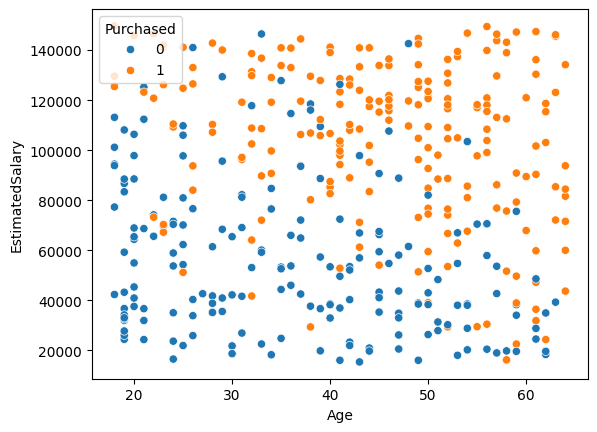

In [ ]:
sns.scatterplot(data=data, x='Age', y='EstimatedSalary', hue='Purchased')
plt.show()

In [ ]:
x = data.drop('Purchased', axis=1)
y = data['Purchased']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st = StandardScaler()
st.fit(x)
x = pd.DataFrame(st.transform(x), columns=x.columns)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
knn.score(x_test, y_test)*100, knn.score(x_train, y_train)*100

(85.0, 85.0)

In [ ]:
knn.predict([[0.574591,0.383107]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
x

,Age,EstimatedSalary
0,1.096777,1.499580
1,0.350797,1.345213
2,-0.693575,0.705363
3,1.395169,-0.342711
4,-1.215761,1.532333
...,...,...
395,0.276199,-1.030346
396,0.723787,-1.367327
397,-1.663349,0.183746
398,0.574591,0.383107


In [ ]:
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    print(f'K: {i}, Accuracy: {knn.score(x_test, y_test)*100},{knn.score(x_train,y_train)*100}')

K: 1, Accuracy: 78.75,100.0
K: 2, Accuracy: 75.0,87.1875
K: 3, Accuracy: 78.75,87.5
K: 4, Accuracy: 81.25,86.875
K: 5, Accuracy: 80.0,86.25
K: 6, Accuracy: 82.5,85.0
K: 7, Accuracy: 83.75,85.0
K: 8, Accuracy: 83.75,84.375
K: 9, Accuracy: 85.0,85.0
K: 10, Accuracy: 85.0,84.0625
K: 11, Accuracy: 85.0,84.375
K: 12, Accuracy: 82.5,84.0625
K: 13, Accuracy: 85.0,84.0625
K: 14, Accuracy: 83.75,84.0625
K: 15, Accuracy: 83.75,84.375
K: 16, Accuracy: 86.25,84.6875
K: 17, Accuracy: 85.0,84.6875
K: 18, Accuracy: 86.25,84.0625
K: 19, Accuracy: 86.25,84.375


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


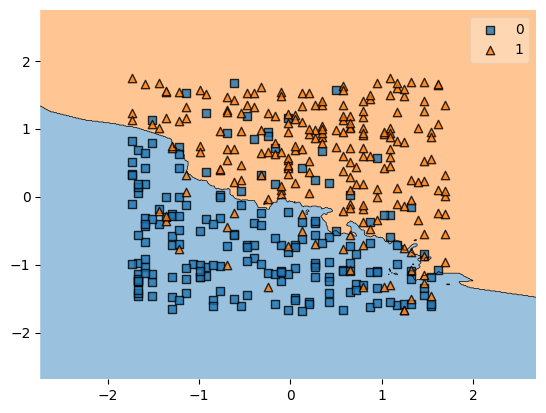

In [ ]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=knn)
plt.show()

**K-Nearest neighbours Regression**

In [ ]:
# **K-Nearest neighbours Regression**

# generate random data
np.random.seed(42) # for reproducibility
num_samples = 400

age = np.random.randint(18, 65, size=num_samples)
experience = np.random.randint(0, 45, size=num_samples) # Assuming experience is less than age
# Simulate salary based on age and experience with some noise
salary = 30000 + 1000 * age + 2000 * experience + np.random.normal(0, 10000, size=num_samples)

# create a pandas DataFrame
data = pd.DataFrame({
    'Age': age,
    'Experience': experience,
    'Salary': salary
})

data

,Age,Experience,Salary
0,56,21,112768.391295
1,46,24,136059.152072
2,32,21,107755.880680
3,60,21,118284.106203
4,25,41,141850.941116
...,...,...,...
395,45,16,113366.314844
396,51,19,116549.303817
397,19,23,86168.427549
398,49,4,80514.481439


In [ ]:
x = data.drop('Salary', axis=1)
y = data['Salary']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knr = KNeighborsRegressor(n_neighbors=19)
knr.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=19)

In [ ]:
knr.score(x_test, y_test)*100, knr.score(x_train, y_train)*100

(83.64382119680327, 87.85153125333875)

In [ ]:
knr.predict([[56,21]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([127077.1008074])